# Case Study: Gastrulation Erythroid

## Import Packages

In [4]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
#srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Velocity Estimation for Sample Genes

In [2]:
%autoreload 2

# raw_path='/Users/chen.weiqing/code/celldancer/mouse_endo_blood20to25_2000_genes_moment100.csv'
# cell_type_u_s_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/GastrulationErythroid.csv'
cell_type_u_s_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/GastrulationErythroid.csv'


cell_type_u_s=pd.read_csv(cell_type_u_s_path)
cell_type_u_s

,gene_name,unsplice,splice,cellID,clusters,embedding1,embedding2
0,Sox17,0.000000,0.043971,cell_363,Blood progenitors 2,3.460521,15.574629
1,Sox17,0.000000,0.000000,cell_382,Blood progenitors 2,2.490433,14.971734
2,Sox17,0.000000,0.018161,cell_385,Blood progenitors 2,2.351203,15.267069
3,Sox17,0.000000,0.000000,cell_393,Blood progenitors 2,5.899098,14.388825
4,Sox17,0.000000,0.000000,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...
24657995,Gm47283,0.214961,1.145533,cell_139318,Erythroid3,8.032358,7.603037
24657996,Gm47283,0.300111,1.072944,cell_139321,Erythroid3,10.352904,6.446736
24657997,Gm47283,0.292607,1.199875,cell_139326,Erythroid3,9.464873,7.261099
24657998,Gm47283,0.266031,1.114659,cell_139327,Erythroid3,9.990495,7.243880


In [3]:
%autoreload 2

max_epoches=200
check_val_every_n_epoch=10
patience=3
permutation_ratio=0.125
n_neighbors=30
speed_up=True
norm_u_s=True
norm_cell_distribution=True
n_jobs=8
save_path=None

gene_list=['Hba-x','Smim1','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2','Hbb-y','Dlc1','Grb10','Rbms2'][0:3]
gene_list=None
# Velocity Estimation
loss_df, cellDancer_df=velocity(cell_type_u_s,\
                             gene_list=gene_list,\
                             max_epoches=max_epoches,\
                             check_val_every_n_epoch=check_val_every_n_epoch,\
                             patience=patience,\
                             permutation_ratio=permutation_ratio,\
                             speed_up=speed_up,\
                             norm_u_s=norm_u_s,\
                             norm_cell_distribution=norm_cell_distribution,\
                             n_jobs=n_jobs,\
                             save_path=save_path)
cellDancer_df

Using /Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-05-28 19-31-00 as the output path.
Arranging genes for parallel job.
2000  genes were arranged to  50  portions.


Velocity Estimation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [27:31<00:00, 33.02s/it]


,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Ift81,0.010658,0.026321,0.009261,0.029549,0.023595,0.042598,0.073999,0.039626,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Ift81,0.000000,0.044266,0.000946,0.037888,0.020649,0.042942,0.074502,0.039626,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Ift81,0.000000,0.064559,0.000885,0.055191,0.019326,0.042876,0.075031,0.039626,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Ift81,0.000000,0.020756,0.001014,0.017791,0.022149,0.043030,0.073879,0.039626,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Ift81,0.000000,0.013184,0.001037,0.011305,0.022633,0.043055,0.073676,0.039626,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,0.000000,1.128435,0.000157,1.125867,0.005920,0.038023,0.013131,0.051755,cell_139318,Erythroid3,8.032358,7.603037
24657996,12325,Mcrip1,0.024356,0.970672,0.016090,1.428982,0.008338,0.037053,0.013950,0.051755,cell_139321,Erythroid3,10.352904,6.446736
24657997,12326,Mcrip1,0.000000,0.899107,0.000175,0.897000,0.006575,0.037644,0.013522,0.051755,cell_139326,Erythroid3,9.464873,7.261099
24657998,12327,Mcrip1,0.017375,1.398107,0.011387,1.729827,0.006885,0.037765,0.013271,0.051755,cell_139327,Erythroid3,9.990495,7.243880


## Sample Genes' Velocity Plot

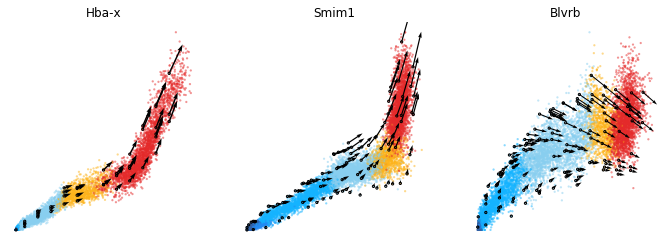

In [4]:
%autoreload 2

gene_list=['Hba-x','Smim1','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2','Hbb-y','Dlc1','Yipf5','Rbms2'][0:3]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

In [5]:
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Ift81,0.010658,0.026321,0.009261,0.029549,0.023595,0.042598,0.073999,0.039626,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Ift81,0.000000,0.044266,0.000946,0.037888,0.020649,0.042942,0.074502,0.039626,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Ift81,0.000000,0.064559,0.000885,0.055191,0.019326,0.042876,0.075031,0.039626,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Ift81,0.000000,0.020756,0.001014,0.017791,0.022149,0.043030,0.073879,0.039626,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Ift81,0.000000,0.013184,0.001037,0.011305,0.022633,0.043055,0.073676,0.039626,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,0.000000,1.128435,0.000157,1.125867,0.005920,0.038023,0.013131,0.051755,cell_139318,Erythroid3,8.032358,7.603037
24657996,12325,Mcrip1,0.024356,0.970672,0.016090,1.428982,0.008338,0.037053,0.013950,0.051755,cell_139321,Erythroid3,10.352904,6.446736
24657997,12326,Mcrip1,0.000000,0.899107,0.000175,0.897000,0.006575,0.037644,0.013522,0.051755,cell_139326,Erythroid3,9.464873,7.261099
24657998,12327,Mcrip1,0.017375,1.398107,0.011387,1.729827,0.006885,0.037765,0.013271,0.051755,cell_139327,Erythroid3,9.990495,7.243880


## Load velocity estimation result of 2000 genes

In [2]:
#detail_file = '/Users/chen.weiqing/code/celldancer/combined_detail.csv'
#cellDancer_df_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000genes_with_bin_and_smooth/combined_detail/celldancer_estimation_renamed.csv'
cellDancer_df_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/fin_parameter_0529/cell_dancer_velocity_2022-05-28 19-31-00/celldancer_estimation.csv'


cellDancer_df=pd.read_csv(cellDancer_df_path)
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Ift81,0.010658,0.026321,0.009261,0.029549,0.023595,0.042598,0.073999,0.039626,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Ift81,0.000000,0.044266,0.000946,0.037888,0.020649,0.042942,0.074502,0.039626,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Ift81,0.000000,0.064559,0.000885,0.055191,0.019326,0.042876,0.075031,0.039626,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Ift81,0.000000,0.020756,0.001014,0.017791,0.022149,0.043030,0.073879,0.039626,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Ift81,0.000000,0.013184,0.001037,0.011305,0.022633,0.043055,0.073676,0.039626,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,0.000000,1.128435,0.000157,1.125867,0.005920,0.038023,0.013131,0.051755,cell_139318,Erythroid3,8.032358,7.603037
24657996,12325,Mcrip1,0.024356,0.970672,0.016090,1.428982,0.008338,0.037053,0.013950,0.051755,cell_139321,Erythroid3,10.352904,6.446736
24657997,12326,Mcrip1,0.000000,0.899107,0.000175,0.897000,0.006575,0.037644,0.013522,0.051755,cell_139326,Erythroid3,9.464873,7.261099
24657998,12327,Mcrip1,0.017375,1.398107,0.011387,1.729827,0.006885,0.037765,0.013271,0.051755,cell_139327,Erythroid3,9.990495,7.243880


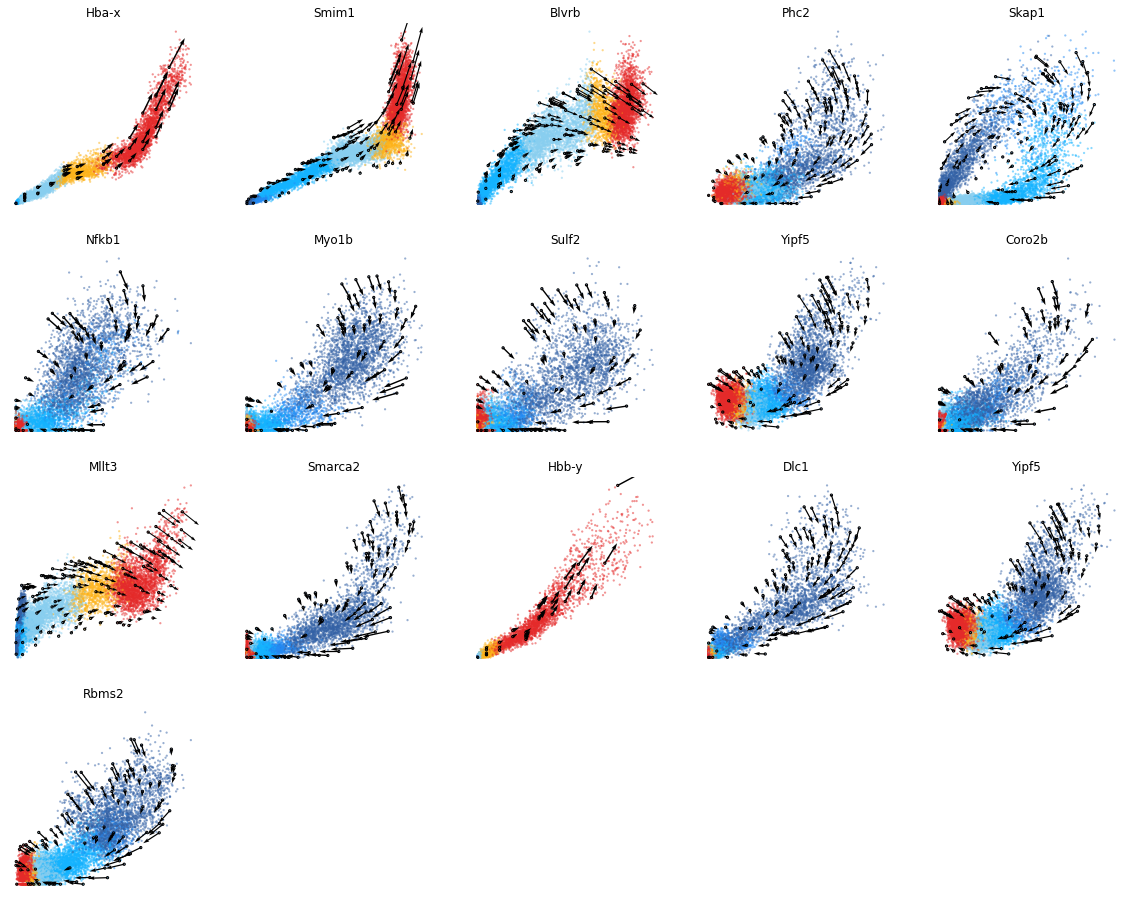

In [5]:
%autoreload 2

gene_list=['Hba-x','Smim1','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2','Hbb-y','Dlc1','Yipf5','Rbms2']#[0:3]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## Compute Cell Velocity and Estimate Pseudotime

(genes, cells): (2000, 12329)
After downsampling, there are  951 cells.


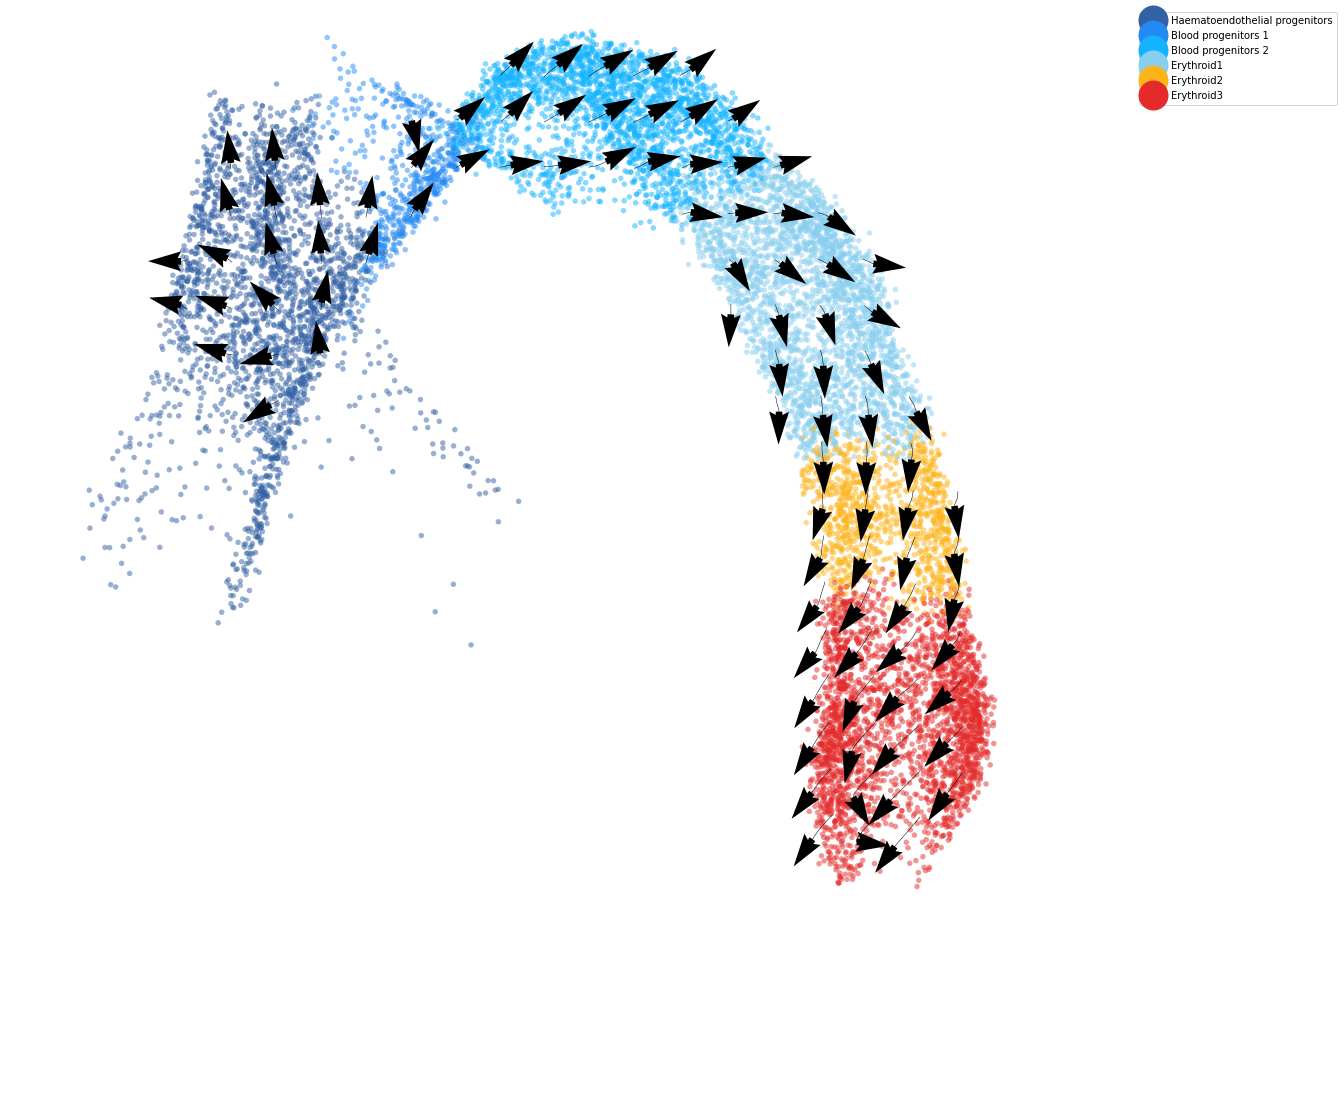

In [6]:
%autoreload 2

# Set parameters
projection_neighbor_choice='gene'
expression_scale='power10'
projection_neighbor_size=10
speed_up=(100,100)

min_mass=15
arrow_grid=(20,20)
custom_xlim=[-6,13]
custom_ylim=[2,16]
s=30
alpha=0.5
display_velocity=True

# compute cell velocity
cellDancer_df=compute(cellDancer_df=cellDancer_df,
              projection_neighbor_choice=projection_neighbor_choice,
              expression_scale=expression_scale,
              projection_neighbor_size=projection_neighbor_size,
              speed_up=speed_up)

# plot cell velocity
fig, ax = plt.subplots(figsize=(20,20))
cdplt.cell.scatter_cell(ax,
                        cellDancer_df, 
                        colors=cdplt.colormap.colormap_erythroid, 
                        alpha=alpha, 
                        s=s,
                        velocity=display_velocity,
                        legend='on',
                        min_mass=min_mass,
                        arrow_grid=arrow_grid,
                        custom_xlim=custom_xlim, 
                        custom_ylim=custom_ylim, )
ax.axis('off')
plt.show()

## Estimate Pseudotime

Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9510/9510 [01:29<00:00, 106.83it/s]


use path_similarity:  0.25
There are 3 clusters.
[0 1 2]


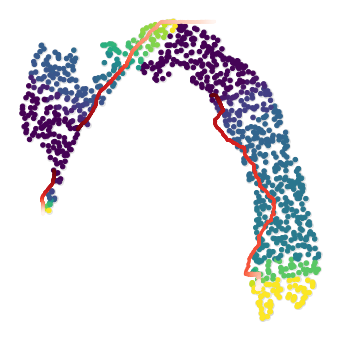




Cluster  0
Total cells in the cluster:  633
MAX allowed zero time cells:  31
MAX allowed terminal cells:  31
Only  22  zero cells left. 
[162, 179, 215, 252, 284, 305, 313, 319, 331, 336, 483, 580, 587, 619, 631, 685, 726, 742, 793, 796, 797, 818]
Only  1  terminal cells left.
[886]
number of paths:  1 1

Display reference paths for cluster 0


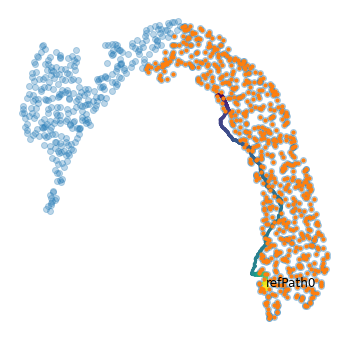




Cluster  1
Total cells in the cluster:  302
MAX allowed zero time cells:  15
MAX allowed terminal cells:  15
Only  1  terminal cells left.
[405]
96  zero cells left.
Sample trajs for zero-time cells in cluster  1   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  1
Total cells in the cluster:  96
MAX allowed zero time cells:  15
MAX allowed terminal cells:  15
Only  1  terminal cells left.
[461]
16  zero cells left.
Sample trajs for zero-time cells in cluster  1   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  1
Total cells in the cluster:  16
MAX allowed zero time cells:  15
MAX allowed terminal cells:  15
Only  8  zero cells left. 
[129, 188, 390, 539, 546, 564, 566, 667]
Only  2  terminal cells left.
[16, 79]
number of paths:  3 3

Display reference paths for cluster 1


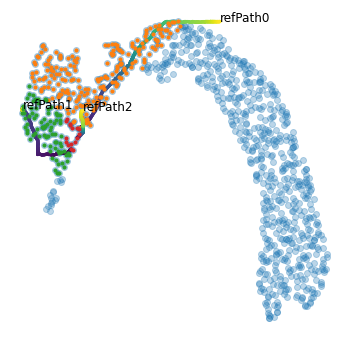


intercluster cell time adjustment
number of cells:  302
Cutoff is  0.03810212366662681
Number of nodes:  3
clusterIDs:  [0, 1, 2]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (705, 116)
pair_cellIDs:  (25, 718)
pair_cellIDs:  (909, 330)
pair_cellIDs:  (339, 713)
pair_cellIDs:  (792, 941)
pair_cellIDs:  (769, 789)
pair_cellIDs:  (89, 487)
pair_cellIDs:  (84, 110)
pair_cellIDs:  (733, 5)

Peak mode:  most_frequent_shift


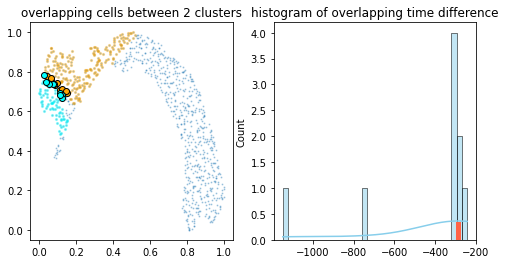

Time shift is:  -294
The overlapping cells are: 
cell  339  from cluster  0  and  713  from cluster  1

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (603, 663)
pair_cellIDs:  (183, 557)
pair_cellIDs:  (538, 561)
pair_cellIDs:  (562, 406)
pair_cellIDs:  (84, 16)

Peak mode:  most_frequent_shift


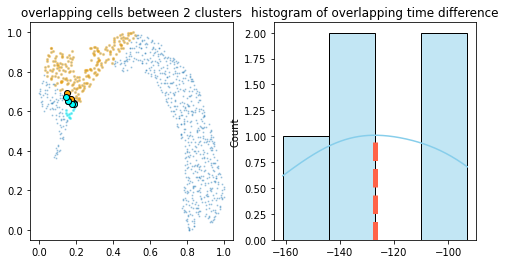

Time shift is:  -130
The overlapping cells are: 
cell  84  from cluster  0  and  16  from cluster  2

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (554, 564)
pair_cellIDs:  (732, 129)
pair_cellIDs:  (110, 79)
pair_cellIDs:  (300, 188)
pair_cellIDs:  (552, 667)
pair_cellIDs:  (377, 390)
pair_cellIDs:  (686, 16)
pair_cellIDs:  (766, 546)

Peak mode:  most_frequent_shift


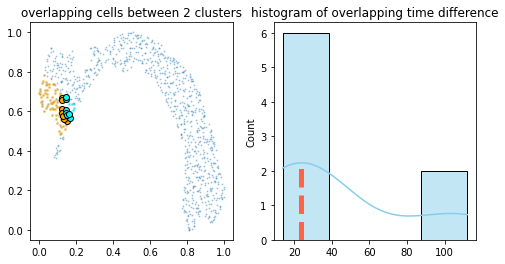

Time shift is:  24
The overlapping cells are: 
cell  377  from cluster  1  and  390  from cluster  2


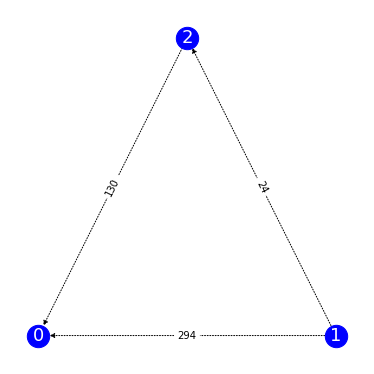

Connected components:  {0, 1, 2}
All nodes adjustment:  {0: 0, 1: -294, 2: -270}



Cluster  2
Total cells in the cluster:  16
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
Only  1  terminal cells left.
[660]
number of paths:  1 1

Display reference paths for cluster 2


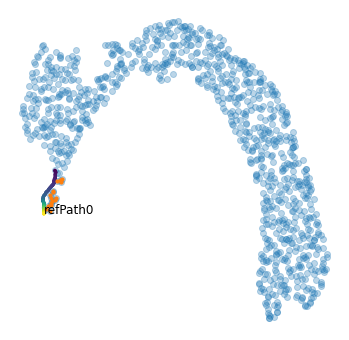




All intra cluster cell time has been resolved.




intercluster cell time adjustment
number of cells:  951
Cutoff is  0.0645934419381603
Number of nodes:  3
clusterIDs:  [0, 1, 2]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (192, 405)
pair_cellIDs:  (336, 616)
pair_cellIDs:  (252, 127)
pair_cellIDs:  (108, 52)
pair_cellIDs:  (49, 258)
pair_cellIDs:  (73, 36)
pair_cellIDs:  (797, 180)
pair_cellIDs:  (96, 394)
pair_cellIDs:  (71, 181)
pair_cellIDs:  (793, 121)
pair_cellIDs:  (691, 368)
pair_cellIDs:  (304, 398)
pair_cellIDs:  (682, 17)
pair_cellIDs:  (305, 670)
pair_cellIDs:  (380, 218)
pair_cellIDs:  (178, 701)
pair_cellIDs:  (675, 75)
pair_cellIDs:  (700, 404)
pair_cellIDs:  (162, 703)
pair_cellIDs:  (161, 370)

Peak mode:  most_frequent_shift


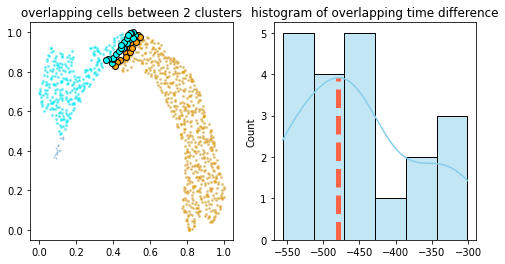

Time shift is:  -478
The overlapping cells are: 
cell  178  from cluster  0  and  701  from cluster  1

Consolidating time between clusters  0  and  2 ...
No close cells between clusters	 (0, 2)

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (544, 662)
pair_cellIDs:  (20, 560)
pair_cellIDs:  (375, 540)
pair_cellIDs:  (665, 666)

Peak mode:  least_shift


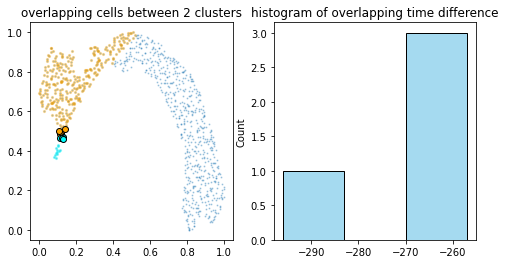

Time shift is:  -257
The overlapping cells are: 
cell  544  from cluster  1  and  662  from cluster  2


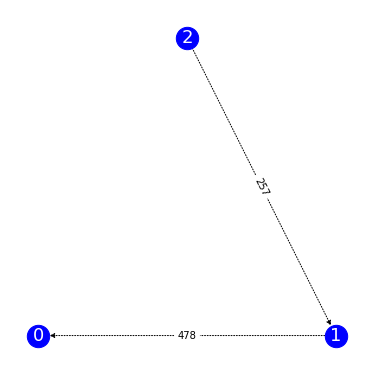

Connected components:  {0, 1, 2}
All nodes adjustment:  {0: 0, 1: -478, 2: -735}


All inter cluster cell time has been resolved.



There are 12329 cells.


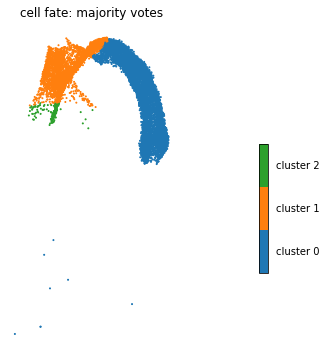

--- 201.334814786911 seconds ---


In [7]:
%autoreload 2

cell_time = dict()
dt = 0.01
#t_total = {dt:int(10/dt)} 
t_total = {0.01: 10000}
n_repeats = 10

grid = (20,20)
speed_up=(100,100)
cellDancer_df = pseudo_time(
    cellDancer_df=cellDancer_df, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    speed_up=speed_up,
    n_paths = 3,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=12)

## Plot Pseudotime

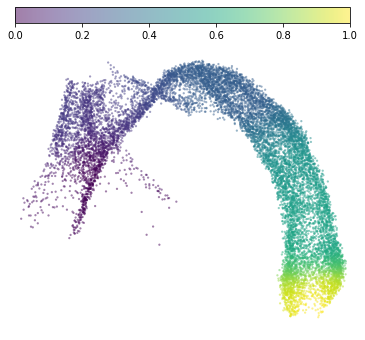

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = cellDancer_df['clusters'].drop_duplicates().to_list()
im=cdplt.cell.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=0.5, 
             velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

## Gene Pseudotime

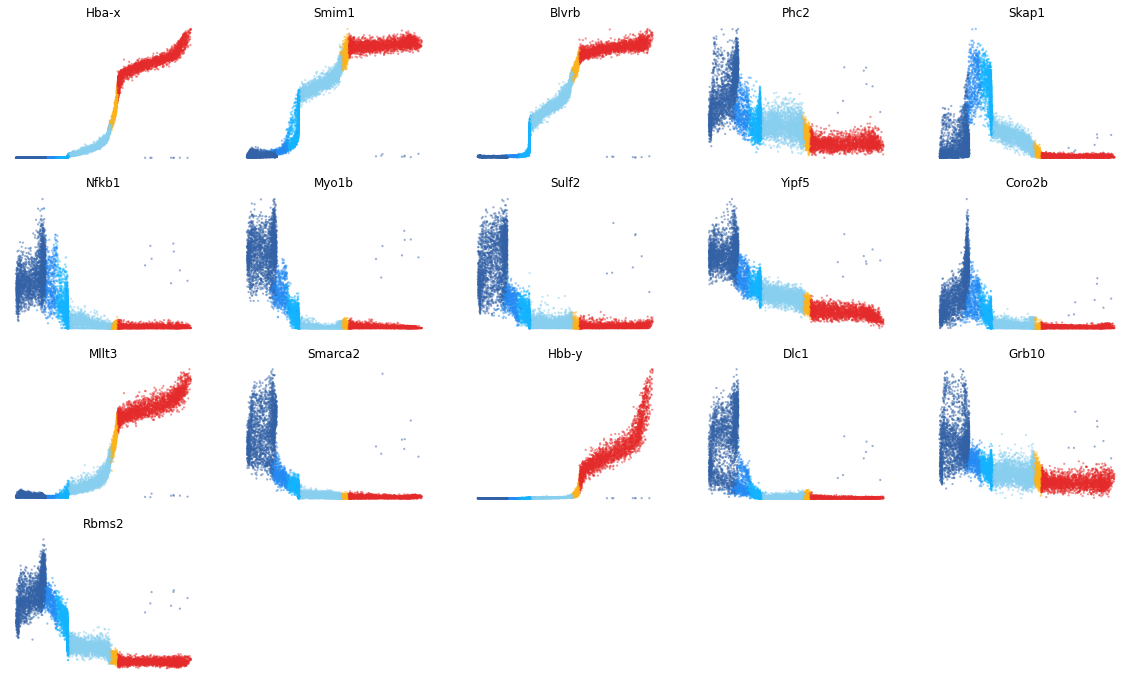

In [9]:
gene_list=['Hba-x','Smim1','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2','Hbb-y','Dlc1','Grb10','Rbms2']

ncols=5
fig = plt.figure(figsize=(20,12))
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

## Murk Genes Cell Velocity

Selected genes:  ['Hba-x', 'Smim1', 'Dcxr', 'Cox6b2', 'Gypa', 'Cpox', 'Hbb-bh1', 'Nudt4', 'Hbb-bt', 'Alad', 'Gpx1', 'Hba-a2', 'Slc25a21', 'Klf3', 'Hsd3b6', 'Tfrc', 'Mgst3', 'Tmem14c', 'Ftl1', 'Arf5', 'Ell2', 'Hbb-y', 'Fech', 'Ssbp2', 'Grap2', 'Rhag', 'Fam210b', 'Arid3a', 'Rfesd', 'Bpgm', 'Alas2', 'Abcg2', 'Hesx1', 'Hemgn', 'Pim1', 'Dhrs11', 'Chchd10', 'Txlng', 'Rmnd5b', 'Prdx2', 'Klhl26', 'Slc4a1', 'Blvrb', 'Abcb10', 'Hebp1', 'Ucp2', 'Mllt3', 'Pklr', 'Gclm', 'Aqp8', 'Lpcat1', 'Top1mt', 'Cdkn3', 'Gstm5', 'Cdc25b', 'Creg1', 'Dnaja4', 'Kcnn4', 'Slc30a10', 'Svbp', 'Tmod1', 'Klf1', 'Cdc42ep3', 'Celf4', 'Prr13', 'Arrb1', 'Cldn13', 'Glrx5', 'Ncf4', 'Ppox', 'Rragd', 'Ctsb', 'Ddias', 'Aqp3', 'Acp1', 'Ddc', 'Gadd45a', 'Nxpe2', 'Fam126a', 'Efcab2', 'Ypel3', 'Hbq1b', 'Mindy2', 'Icam4', 'Fuca2', 'Kdm7a', 'Htatip2', 'Asns', 'Slc25a37']
(genes, cells): (61, 12329)
Caution! Overwriting the 'velocity' columns.
After downsampling, there are  951 cells.


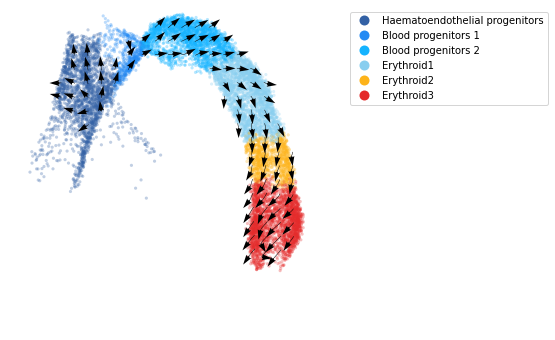

In [17]:
murk_gene_pd=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/MURK_genes/13059_2021_2414_MOESM3_ESM.csv')
murk_gene_list=list(murk_gene_pd['index'])

# Set Parameters
n_neighbors=10
speed_up=(100,100)
projection_neighbor_choice='gene'
expression_scale='power10'
min_mass=15
arrow_grid=(20,20)
custom_xlim=[-6,13]
custom_ylim=[2,16]
alpha_inside=0.3

# Compute Cell Velocity
compute(cellDancer_df=cellDancer_df,
              gene_list=murk_gene_list,
              projection_neighbor_choice=projection_neighbor_choice,
              expression_scale=expression_scale,
              projection_neighbor_size=projection_neighbor_size,
              speed_up=speed_up)

fig, ax = plt.subplots(figsize=(6,6))
im = cdplt.cell.scatter_cell(ax,cellDancer_df, colors=colormap.colormap_erythroid, alpha=alpha_inside, s=10,
             velocity=True, custom_xlim=custom_xlim, custom_ylim=custom_ylim, legend='on',min_mass=min_mass,arrow_grid =arrow_grid)
ax.axis('off')
plt.show()